In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Week-6

**Note:**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.



## Dataset

Run the cell given below to generate the data-matrix $X$ and target vector $y$. $X$ is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. $y$ is of shape $(n,)$. You will be using this dataset for the rest of the assignment.

**Do not edit this cell.**

In [ ]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y = True)

# set the random seed value to 0
np.random.seed(0)

## Problem 1
How many samples are there in the dataset?



## Solution

In [ ]:
# Write your solution code here
samples = X.shape[0]
print(samples)

442


## Problem 2

How many features are there in the dataset?



## Solution

In [ ]:
# Write your solution code here
features = X.shape[1]
print(features)

10


## Problem 3
Write a function `shuffle_data(X, y)` that returns the shuffled $X$ and $y$.



Note that it should shuffle the data pairs $(x_i, y_i)$.

What will be the mean of the first 5 values in $y$?



In [ ]:
# Write your solution code here
from sklearn.utils import shuffle

def shuffle_data(X, y):
  X_shuffle , y_shuffle = shuffle(X , y , random_state = 0)
  return X_shuffle , y_shuffle

# Alternate Method
'''
import numpy as np

def shuffle_data(x,y):
  # Set a random seed for reproducibility if needed
    np.random.seed(0)

    # Generate a permutation of indices based on the length of y
    permutation = np.random.permutation(len(y))

    # Apply this permutation to both X and y
    X_shuffled = X[permutation]
    y_shuffled = y[permutation]

    return X_shuffled, y_shuffled

'''
# First Shuffle the data
X_shuffled , y_shuffled = shuffle_data(X , y)

# Finding mean of the first 5 values in y
mean_of_5_values_in_y = y_shuffled[:5].mean()
print("the mean of the first 5 values in y is :", mean_of_5_values_in_y)

# Alternate Way
'''
print((y_shuffled[:5].sum()) / 5)
'''

the mean of the first 5 values in y is : 180.4


'\nprint((y_shuffled[:5].sum()) / 5)\n'

# **SEED Function in Python**
The Concept of np.random.seed()
Imagine we have a deck of cards. Every time we shuffle it, the order of the cards changes. Now, what if we want to shuffle the deck in exactly the same way every time we start a game? That’s where the seed comes in. By setting a seed, we’re telling the random shuffling process to use a specific pattern.

**Without a Seed:**

**Generate random numbers without setting a seed**



```
import numpy as np

random_numbers = np.random.rand(5)

print(random_numbers)
```



Each time we run this, we'll get different numbers.

With a Seed:



```
import numpy as np

# Set the seed
np.random.seed(0)

# Generate random numbers with the seed set
random_numbers = np.random.rand(5)
print(random_numbers)

```

Every time we run this code, we'll get the same sequence of random numbers


## Problem 4

Write a function `train_test_split(X, y, test_size)` that divides the data (X, y) into $X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ respectively as per test_size which should be a value between 0 and 1.

That is, if test_size = $t$, then `int(t*n)` data points should go to test and the remaining data points should go to train.

$X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ should be returned by the function.

Set the test_size to be 0.25 and output the sum of all y values settling in $y_{test}$.








In [ ]:
# Write your solution code here
def train_test_split(X, y, test_size):

  test_size = int((test_size) * samples)
  train_size = samples - test_size
  # print(train_size) --> for debugging purpose

  X_train , X_test = X_shuffled[:train_size] , X_shuffled[train_size:]
  y_train , y_test = y_shuffled[:train_size] , y_shuffled[train_size:]

  return X_train , X_test , y_train , y_test

# Calling the function
X_train , X_test , y_train , y_test = train_test_split(X_shuffled , y_shuffled , test_size = 0.25)

# Sum of all y_values setting in y_test
print("Sum of all y_values setting in y_test is : " , y_test.sum())

# Alternate Method (Easy One)
'''
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 ,  random_state = 0)

and with this method there is no need to shuffle the data seperately as in this method ,
it first shuffles the data and then selects randomly samples
'''

Sum of all y_values setting in y_test is :  16960.0


'\nfrom sklearn.model_selection import train_test_split\nX_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 ,  random_state = 0)\n\nand with this method there is no need to shuffle the data seperately as in this method ,\nit first shuffles the data and then selects randomly samples\n'

## Problem 5

What are the shapes of $X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ respectively?



In [ ]:
# Write your solution code here
shape_of_X_train = X_train.shape
shape_of_X_test = X_test.shape
shape_of_y_train = y_train.shape
shape_of_y_test = y_test.shape

print("shape_of_X_train :" , shape_of_X_train)
print("shape_of_X_test : " , shape_of_X_test)
print("shape_of_y_train :" , shape_of_y_train)
print("shape_of_y_test : " , shape_of_y_test)

shape_of_X_train : (332, 10)
shape_of_X_test :  (110, 10)
shape_of_y_train : (332,)
shape_of_y_test :  (110,)


## Problem 6
Add a dummy feature, i.e., a column containing all 1's (as the first column) in $X_{train}$ and $X_{test}$.

Take the transpose of both $X_{train}$ and $X_{test}$.

What are the shapes of $X_{train}$ and $X_{test}$?



In [ ]:
# Write your solution code here
X_train_with_ones = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
print(X_train_with_ones.shape)
X_test_with_ones = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
# hstack() is Horizontal Stack

# Taking Transpose
X_train_transpose = X_train_with_ones.T
X_test_transpose = X_test_with_ones.T

# Printing the Shapes of X_train and X_test
print("The Shape of X_train Transpose is : " , X_train_transpose.shape)
print("The Shape of X_test Transpose is : " ,X_test_transpose.shape)

(332, 11)
The Shape of X_train Transpose is :  (11, 332)
The Shape of X_test Transpose is :  (11, 110)


# **Explaination of the Above Code**

Adding a dummy feature (a column of ones) to a dataset is a common practice in linear regression and other linear models. This is typically done to incorporate the intercept term (also called the bias term) into the model.

In a typical linear regression model, the goal is to fit a line (or a hyperplane in higher dimensions) that best represents the relationship between the input features 𝑋 and the output target 𝑦. The standard linear regression model is:

$$
y = w_1 x_1 + w_2 x_2 + \dots + w_n x_n
$$

$$
where
$$

$$
x_1, x_2, \ldots, x_n \quad \text{are the feature inputs}
$$


$$
w_1, w_2, \ldots, w_n \quad \text{are the weights for each feature}
$$


$$
b \text{ is the intercept or bias term.}
$$








## Problem 7

Write a function `compute_weights(X, y)` that uses the closed form formula of linear regression and returns a weight vector.

Call this function by passing $X_{train}$ and $y_{train}$. As the dummy feature was added as the first column, the first value in the weight vector will be the intercept. What is its value (rounded to one decimal place)?



In [ ]:
# Write your solution code here
def compute_weights(X, y):
    # Step 1: Calculate X^T (transpose of X)
    X_transpose = X.T

    # Step 2: Calculate (X^T * X)
    XX_transpose = X_transpose @ X

    # Step 3: Calculate the inverse of (X^T * X)
    XX_transpose_inverse = np.linalg.inv(XX_transpose)

    # Step 4: Calculate (X^T * y)
    X_y = X_transpose @ y

    # Step 5: Calculate w = (X^T * X)^(-1) * X^T * y
    w = XX_transpose_inverse @ X_y

    return w

# Assuming X_train_with_ones includes the bias (column of ones)
weight_vector = compute_weights(X_train_with_ones, y_train)

In [ ]:
print(weight_vector)
print(weight_vector.shape)

# Intercept (first value in the weight vector)
intercept = round(weight_vector[0], 1)

print("Intercept:", intercept)


[ 150.80818855  -37.55141005 -236.69770894  495.94156781  332.66085205
 -985.56901674  608.20547786  225.71676823  214.06133319  769.84183095
  125.14414735]
(11,)
Intercept: 150.8


# **About the Weight Vector & Intercept Value**

Formula used above is as follows:



$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} (\mathbf{X}^T \mathbf{y})
$$

$$
Where
$$

$$
\mathbf{w}:\text{is the weight vector}
$$

$$
\mathbf{X}:\text{is the input matrix (with dummy column of 1s)}
$$

$$
\mathbf{y}:\text{is the label vector}
$$

To find the intercept value in the weight vector, we need to implement the compute_weights function using the closed-form solution for linear regression


The intercept is the first value in the weight vector because we added a column of ones as the first column in our feature matrix. This allows the linear regression model to include the intercept term naturally during the weight calculation process.

## Problem 8

Write a function `MSE(X, y, w)` that returns the mean squared error for the given `X`, `y` as per `w` values.

Using this function, compute the train error and test error.

Note: Here `y` is the true `y` for `X`.

Compute both train and test error.

What is the value of test error?


In [ ]:
# Write your solution code here
def MSE(X , y , w):
  Xw = X @ w
  diff = (Xw - y)
  Mean_Squared_Error = np.mean(diff ** 2)
  return Mean_Squared_Error

Train_Error = MSE(X_train_with_ones , y_train , weight_vector)
Test_Error = MSE(X_test_with_ones , y_test , weight_vector)

print("Train Error is : " , Train_Error)
print("Test Error is : " ,Test_Error)

Train Error is :  2921.8874514067493
Test Error is :  2745.430111174355


## Problem 9

Write a function `compute_weights_ridge(X, y)` that uses the closed form formula of Ridge regression and returns a weight vector.

Call this function by passing  `X_train`, `y_train` and 0.3 as the value of regularization strength.


Find the sum of values in the weight vector obtained. How much reduction in total sum of weights is achieved with respect to the the weight vector obtained from 'plain' linear regression (without regularization) computed earlier.


In [ ]:
# Write your solution code here
def compute_weights_ridge(X , y, R):

  X_transpose_X = X.T @ X
  # Since X_transpose_X is a Square Matrix we can easily create
  # a corresponding Identity matrix of same shape

  Identity_Matrix = np.eye(X_transpose_X.shape[0], X_transpose_X.shape[1])
  Regularizer_Identity_matrix = R * Identity_Matrix

  # Adding the matrices
  m = X_transpose_X + Regularizer_Identity_matrix

  # Taking the Inverse if the matrix m
  m_inverse = np.linalg.inv(m) # -----------> 1

  # Computing the Product of X^T y
  m1 = X.T @ y # ---------------------------> 2

  # Mulitplying 1 & 2
  w = m_inverse @ m1

  # Returning the final Weight Vector
  return w

# Calling the Function and storing the result in a variable
weight_vector_Ridge = compute_weights_ridge(X_train_with_ones , y_train , 0.3)
print(weight_vector_Ridge)

[ 151.06379834    1.22192839 -142.74026577  386.0768882   269.1193914
  -30.20155721  -71.07733651 -151.21600325  105.59399288  329.16542194
  135.52074802]


In [ ]:
# Find the sum of values in the weight vector obtained.
# How much reduction in total sum of weights is achieved with respect to the the weight
# vector obtained from 'plain' linear regression (without regularization) computed earlier.

w_sum_ridge = weight_vector_Ridge.sum()
w_sum_standard = weight_vector.sum()

print("The Sum of Values in the weight vector obtained under Ridge Regression is : " , w_sum_ridge)
print("\n")
print("Reduction in total sum of weights is achieved with respect to the weight vector" + "\n" +
      "vector obtained from 'plain' linear regression (without regularization) computed earlier is : " , w_sum_standard - w_sum_ridge)

The Sum of Values in the weight vector obtained under Ridge Regression is :  982.5270064293238


Reduction in total sum of weights is achieved with respect to the weight vector
vector obtained from 'plain' linear regression (without regularization) computed earlier is :  680.0350238507224


In [ ]:
# Checking the shape of X_train_transpose @ X_train_with_ones
# for debugging purpose
M = X_train_transpose @ X_train_with_ones
print(M.shape)

(11, 11)


# **Formula Used For Computing The Weight Vector in Ridge Regression**



$$
\hat{\mathbf{w}}_R = (\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})^{-1} (\mathbf{X}^T \mathbf{y})
$$

$$ where $$
$$ \mathbf{X}:  \textbf{is the feature Matrix}. $$
$$ \lambda: \text{is the Regularization Parameter} $$
$$ \mathbf{I}:  \textbf{is the Identity Matrix}. $$

# **Ways to Create Identity Matrix**

In [ ]:
id = np.identity(3)
print(id)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
# Alternate way to Create An Indentity Matrix
id1 = np.eye(3)
print(id1)
'''
The np.eye() function is more flexible. It allows us to create a square identity
matrix or a rectangular matrix with ones on the diagonal and zeros elsewhere.
'''

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


'\nThe np.eye() function is more flexible. It allows us to create a square identity\nmatrix or a rectangular matrix with ones on the diagonal and zeros elsewhere.\n'

In [ ]:
# We can also create a rectangular matrix using np.eye()
# by specifying the number of rows and columns:

id3 = np.eye(M.shape[0], M.shape[1])
print(id3)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Problem 10

Compute the train error and test error. What is their absolute difference?



In [ ]:
# Write your solution code here

# Calling the MSE() Function defined earlier
Train_Error_Ridge = MSE(X_train_with_ones , y_train , weight_vector_Ridge)
Test_Error_Ridge = MSE(X_test_with_ones , y_test , weight_vector_Ridge)

print("Train Error under Ridge Regression is : " , Train_Error_Ridge)
print("Test Error under Ridge Regression is : " ,Test_Error_Ridge)
print("The Absolute Difference Between Train_Error & Test Error under Ridge Regression is :" , abs(Test_Error_Ridge - Train_Error_Ridge))

Train Error under Ridge Regression is :  3058.8016386551403
Test Error under Ridge Regression is :  2959.3318999461417
The Absolute Difference Between Train_Error & Test Error under Ridge Regression is : 99.46973870899865


## Problem 11

Use 10 different values between 0 and 5 as the regularization strength and keep a record of the weight vectors obtained for each. Further, calculate the sum of weights for each weight vector.

Plot these sums of weights (on y-axis) with respect to the regularization strength (on x-axis) and observe the reduction in (sum of) weights.



In [ ]:
# Write your solution code here

# Computing and Storing different values
# for lambda and computing the corresponding sum
# of weight vector at that lambda (or regularizer)
# and then storing this info in a dictionary
# where keys are values of regularizer
# and values are weight vectoe sums values

import random
diff_regularizer_values_weights = {}
random.seed(0)

for _ in range(10):
  value = round(random.uniform(0 , 5) , 2)
  value_w = (compute_weights_ridge(X_train_with_ones , y_train , value)).sum()
  diff_regularizer_values_weights[value] = round(value_w , 2)

print(diff_regularizer_values_weights)

{4.22: 551.15, 3.79: 576.42, 2.1: 714.51, 1.29: 814.89, 2.56: 669.16, 2.02: 723.16, 3.92: 568.46, 1.52: 783.3, 2.38: 686.06, 2.92: 638.25}


Text(0.5, 1.0, 'Sum of Weight Vectors V/S Regularizer Values (or $\\lambda$)')

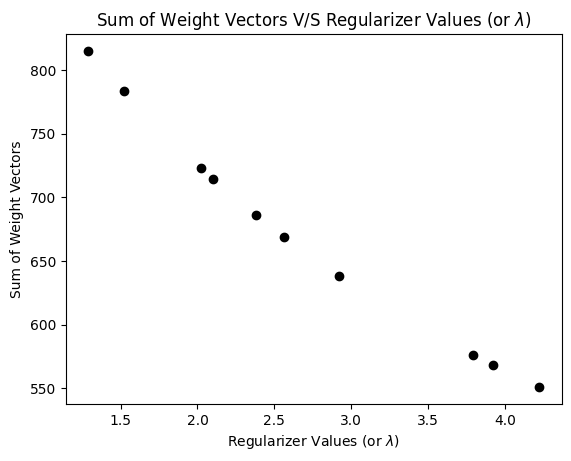

In [ ]:
plt.scatter(diff_regularizer_values_weights.keys() , diff_regularizer_values_weights.values() , color = "black")
plt.xlabel("Regularizer Values (or $\\lambda$)")
plt.ylabel("Sum of Weight Vectors")
plt.title("Sum of Weight Vectors V/S Regularizer Values (or $\\lambda$)")
# plt.legend()

# **Computing R Square Value (R^2)**



In [ ]:
# Creating the Function For Residual Sum Squared
def RSS(X , y , w):
  Xw = X @ w
  diff = Xw - y
  Residual_Sum_Sq = (diff ** 2).sum()

  return Residual_Sum_Sq

Standard_Linear_RSS = RSS(X_test_with_ones , y_test , weight_vector)
Ridge_Regression_RSS = RSS(X_test_with_ones , y_test , weight_vector_Ridge)

print("The Residual Sum Squared for Standard Linear Regression Algorithm is : ", Standard_Linear_RSS)
print("The Residual Sum Squared for Ridge Linear Regression Algorithm is : ", Ridge_Regression_RSS)
print("_____________________________________________________________________________________________")

# __________________________________________________________________________________________________________

# Creating the Function For Total Sum Squared
def TSS(y):
  avg_y = np.average(y)
  Total_Sum_Sq = ((y - avg_y) ** 2).sum()

  return Total_Sum_Sq

Common_TSS = TSS(y_test)
print("The Total Sum Squared for Both the Algorithms is : " , Common_TSS)

The Residual Sum Squared for Standard Linear Regression Algorithm is :  301997.312229179
The Residual Sum Squared for Ridge Linear Regression Algorithm is :  325526.5089940756
_____________________________________________________________________________________________
The Total Sum Squared for Both the Algorithms is :  736044.3636363635


In [ ]:
unexplained_variance_standard = round((Standard_Linear_RSS / Common_TSS) , 2)
explained_variance_standard = 1 - unexplained_variance_standard

print("The R^2 Square for Standard Linear Algorithm is : " , round(explained_variance_standard , 2))

The R^2 Square for Standard Linear Algorithm is :  0.59


In [ ]:
unexplained_variance_ridge = round((Ridge_Regression_RSS / Common_TSS) , 2)
explained_variance_ridge = 1 - unexplained_variance_ridge

print("The R^2 Square for Ridge_Regression Algorithm is : " , round(explained_variance_ridge , 2))

The R^2 Square for Ridge_Regression Algorithm is :  0.56


# **R^2 Square Evaluation Metric Explaination**

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

$$ {\sum_{i=1}^{n} (y_i - \hat{y}_i)^2} : RSS$$
$$ {\sum_{i=1}^{n} (y_i - \bar{y})^2} : TSS$$

$$ where $$
$$ \text{RSS} : \text{Residual Sum of Squares} $$
$$ \text{TSS} : \text{Total Sum of Squares} $$

**Definition**

The R-squared (or coefficient of determination) measures the proportion of the variance in the dependent variable
𝑦
 that is predictable from the independent variables
𝑋
.

**RSS**

This is the sum of the squared differences between the actual values 𝒚i and the predicted values ̂{y}_i . It measures how much error remains in the model's predictions.


**TSS**

This measures the total variation in the data, i.e., how much the actual values
𝒚i deviate from the mean of the data y avg . It's the total variability in
𝑦
that we are trying to explain with our model.



**Intuition of R^2**

It tells us how much of the total variation in
𝑦
is explained by the model.



*   When R^2 = 1 : All the points lie perfectly on the regression line, meaning 100% of the variation in
𝑦
is explained by
𝑋

*   When R^2 = 0 : The model does no better than simply predicting the mean of
𝑦 for every point (no explanatory power).

